In [1]:
!source ./bin/activate

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
data_uri = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"

In [15]:
df = pd.read_csv(data_uri)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [17]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [18]:
features = ['latitude', 'longitude', 'depth']
label = 'mag'

In [19]:
df = df.dropna(subset=[label])

In [20]:
for col in features:
    df[col] = df[col].fillna(df[col].median())

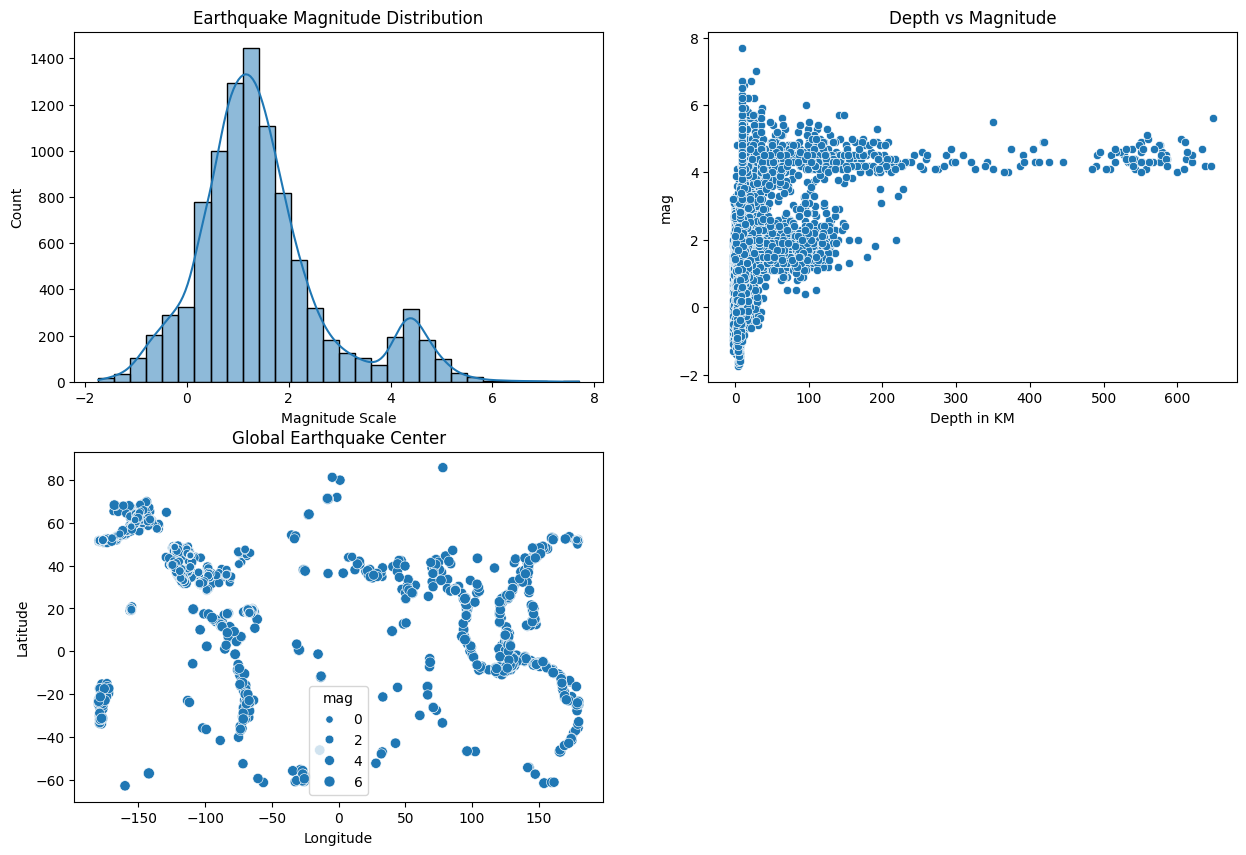

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude Scale")
sb.histplot(df[label],kde=True,bins=30)

plt.subplot(2,2,2)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth in KM")
sb.scatterplot(x='depth',y=label,data=df)

plt.subplot(2,2,3)
plt.title("Global Earthquake Center")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sb.scatterplot(x='longitude',y='latitude',size=label,data=df)

plt.show()

In [24]:
feature_data = df[features]
label_data = df[label]
print(feature_data)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [25]:
train_ft,test_ft,train_lb,test_lb=train_test_split(feature_data, label_data, test_size=0.2, random_state=100)